📂 Please upload an image (HEIC or other format)...


Saving IMG_3817.HEIC to IMG_3817 (2).HEIC
✅ Uploaded: IMG_3817 (2).HEIC


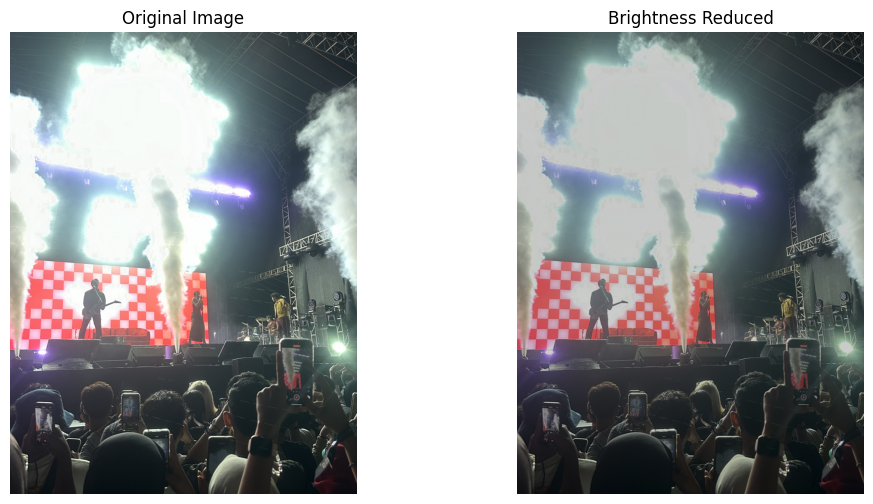

✅ Saved as reduced_brightness.png


In [10]:
!pip install pillow pyheif opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pyheif
from google.colab import files

print("📂 Please upload an image (HEIC or other format)...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("✅ Uploaded:", filename)

if filename.lower().endswith(".heic"):
    heif_file = pyheif.read(filename)
    img = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
    )
    img = np.array(img)
else:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

brightness_factor = 0.8
darker_img = np.clip(img * brightness_factor, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(darker_img)
plt.title("Brightness Reduced")
plt.axis("off")
plt.show()

cv2.imwrite("reduced_brightness.png", cv2.cvtColor(darker_img, cv2.COLOR_RGB2BGR))
print("✅ Saved as reduced_brightness.png")
